# Cargamos la librería

In [1]:
import numpy as np
import pandas as pd 

# importar archivos
import os
import glob


from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.python.keras import regularizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from IPython.display import Image

In [2]:
Train= 'C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/combinado1/train/'
Val1 = 'C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/combinado1/test/'

# Modelo con Data Augmentation

## Preprocesado

In [3]:
from PIL import Image
X = []
y = []
image_size = (32, 32)  # Tamaño común para las imágenes

for filename in glob.glob(Train + "***/*.*"):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            
            with Image.open(filename) as img:
                img = img.convert('RGB')  # Convertir todas las imágenes a RGB
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                X.append(img_array)
                
                if "FAKE" in filename:
                    y.append(0)
                else:
                    y.append(1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35352, 32, 32, 3), (35352,), (8838, 32, 32, 3), (8838,))

Observamos el balance de datos 

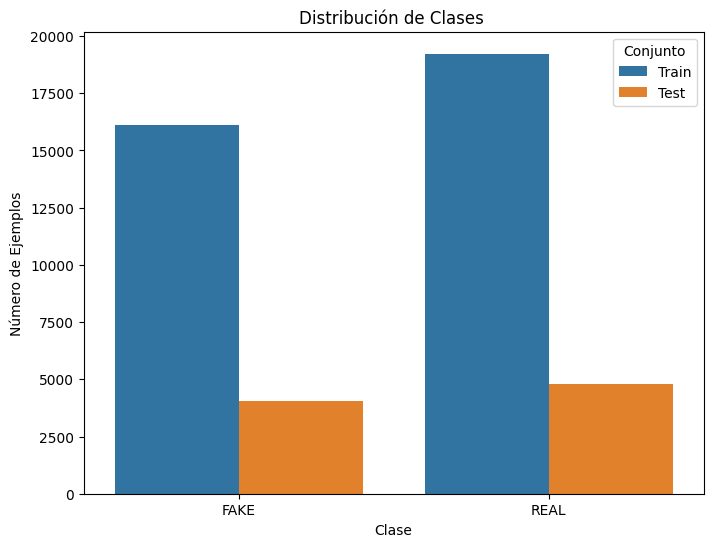

In [58]:
train_counts = Counter(y_train)
test_counts = Counter(y_test)
categories = ['FAKE', 'REAL']

# Crear listas para las etiquetas de las clases y sus respectivos conteos
classes = categories  # Suponiendo que categories = ['REAL', 'FAKE']
train_values = [train_counts[i] for i in range(len(classes))]
test_values = [test_counts[i] for i in range(len(classes))]

# Crear un DataFrame para facilitar la visualización con seaborn
import pandas as pd

df = pd.DataFrame({
    'Clase': classes * 2,
    'Número de ejemplos': train_values + test_values,
    'Conjunto': ['Train'] * len(classes) + ['Test'] * len(classes)
})

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Clase', y='Número de ejemplos', hue='Conjunto', data=df)
plt.title('Distribución de Clases ')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.show()

Como los datos no están balanceados, realizamos data augmentation

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar el generador con técnicas de aumento de datos
datagen = ImageDataGenerator(
    rescale=1.0/255.0,             
    rotation_range=20,             
    width_shift_range=0.2,        
    height_shift_range=0.2,        
    shear_range=0.2,               
    zoom_range=0.2,                
    horizontal_flip=True,          
    fill_mode='nearest'            
)

train_it = datagen.flow(X_train, y_train, batch_size=64)
test_it = datagen.flow(X_test, y_test, batch_size=64)

## Construimos el modelo 

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))


c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.76      0.81      0.79     20190
        REAL       0.83      0.79      0.81     24000

    accuracy                           0.80     44190
   macro avg       0.80      0.80      0.80     44190
weighted avg       0.80      0.80      0.80     44190


Batch Normalization 

In [27]:
# model4 = models.Sequential()
# model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model4.add(layers.BatchNormalization()) 
# model4.add(layers.MaxPooling2D((2, 2)))
# model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model4.add(layers.BatchNormalization())
# model4.add(layers.MaxPooling2D((2, 2)))
# model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model4.add(layers.BatchNormalization())
# model4.add(layers.MaxPooling2D((2, 2)))
# model4.add(layers.Flatten())
# model4.add(layers.Dropout(0.4))  
# model4.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model4.add(layers.Dense(1, activation='sigmoid'))



c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.80      0.76      0.78     20190
        REAL       0.80      0.84      0.82     24000

    accuracy                           0.80     44190
   macro avg       0.80      0.80      0.80     44190
weighted avg       0.80      0.80      0.80     44190

In [61]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model4.fit(train_it, validation_data=test_it, epochs=50)

Epoch 1/50


c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


553/553 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.5832 - loss: 1.2843 - val_accuracy: 0.6179 - val_loss: 0.6549
Epoch 2/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.6284 - loss: 0.6444 - val_accuracy: 0.5875 - val_loss: 0.6591
Epoch 3/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - accuracy: 0.6474 - loss: 0.6254 - val_accuracy: 0.6609 - val_loss: 0.6190
Epoch 4/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.6710 - loss: 0.6107 - val_accuracy: 0.6709 - val_loss: 0.6015
Epoch 5/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.6838 - loss: 0.5935 - val_accuracy: 0.6733 - val_loss: 0.6082
Epoch 6/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.6862 - loss: 0.5897 - val_accuracy: 0.7028 - val_loss: 0.5696
Epoch 7/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.7016 - loss: 0.5716 - val_accuracy: 0.6955 - val_loss: 0.5888
Epoch 8/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 43s 78ms/step - accuracy: 0.7195 - loss: 0.5554 - val_accurac

## Evaluamos el modelo 

Preprocesado

In [63]:
X = []
y = []
image_size = (32, 32)  # Tamaño común para las imágenes

for filename in glob.glob(Val1 + "***/*.*"):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            
            with Image.open(filename) as img:
                img = img.convert('RGB')  # Convertir todas las imágenes a RGB
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                X.append(img_array)
                
                if "FAKE" in filename:
                    y.append(0)
                else:
                    y.append(1)

In [64]:
X_val = np.array(X)
y_val = np.array(y)

In [65]:

X_val.shape, y_val.shape

((44190, 32, 32, 3), (44190,))

Graficamos

C:\Users\naira\AppData\Local\Temp\ipykernel_53152\739581554.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase', y='Número de Ejemplos', data=df, palette='viridis')


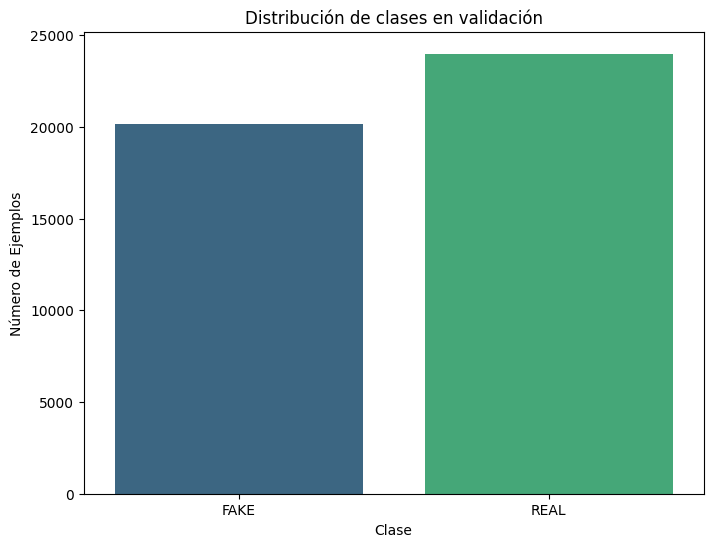

In [14]:
unique, counts = np.unique(y_val, return_counts=True)
class_counts = dict(zip(unique, counts))

# Crear listas para las etiquetas de las clases y sus respectivos conteos
labels = ['FAKE', 'REAL']  # Etiquetas de las clases
val_counts = [class_counts.get(i, 0) for i in range(len(labels))]
df = pd.DataFrame({
    'Clase': labels,
    'Número de Ejemplos': val_counts
})

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Clase', y='Número de Ejemplos', data=df, palette='viridis')
plt.title('Distribución de clases en validación')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.show()

Reescalamos 

In [66]:
datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_it = datagen.flow(X_val, y_val, batch_size=64)


Precisión

In [67]:
_, acc = model4.evaluate(val_it)
print('> %.3f' % (acc * 100.0))


691/691 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7967 - loss: 0.4461
> 79.912


In [68]:
def show_loss_accuracy_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

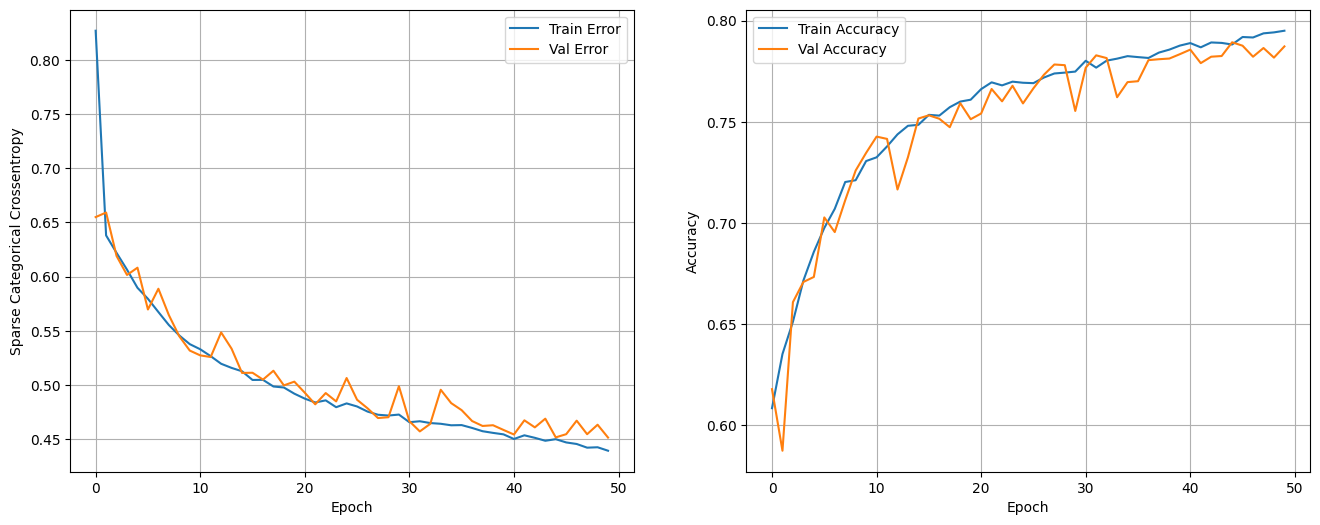

In [69]:
show_loss_accuracy_evolution(history)

La Curva ROC

1381/1381 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


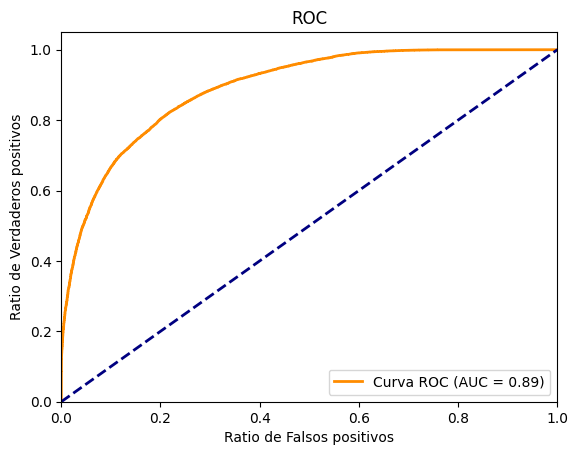

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_val_escalado = X_val*(1/255)
y_pred_prob = model4.predict(X_val_escalado)  

fpr, tpr, _ = roc_curve(y_val, y_pred_prob)  


roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos positivos')
plt.ylabel('Ratio de Verdaderos positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, x_test, y_test):
    # Realizar predicciones
    X_test_escalado = x_test*(1/255)
    y_pred = model.predict(X_test_escalado)
    y_pred_classes = (y_pred > 0.5).astype(int) 
    
    # Calcular métricas
    cm = confusion_matrix(y_test, y_pred_classes)
    report = classification_report(y_test, y_pred_classes, target_names=['IA', 'REAL'])
    
    print("Reporte de Clasificación:\n", report)
    
    # Mostrar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['IA', 'REAL'], yticklabels=['IA', 'REAL'])
    plt.xlabel('Predicciones')
    plt.ylabel('Verdaderas')
    plt.title('Matriz de Confusión')
    plt.show()


1381/1381 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step
Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.76      0.81      0.79     20190
        REAL       0.83      0.79      0.81     24000

    accuracy                           0.80     44190
   macro avg       0.80      0.80      0.80     44190
weighted avg       0.80      0.80      0.80     44190



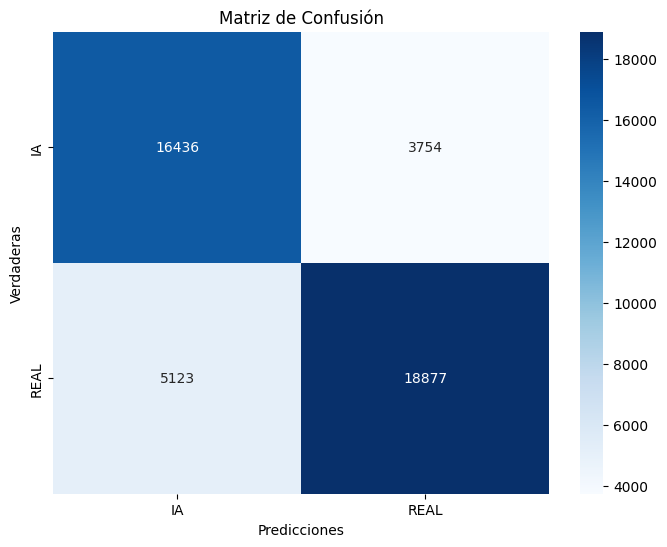

In [71]:
evaluate_model(model4,X_val, y_val)

Predicción

In [72]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_path,model):

    # Cargar la imagen y redimensionar a 32x32
    image1 = Image.open(img_path)
    image1 = image1.resize((32, 32))  # Redimensionar la imagen a 32x32 píxeles
    img_ar = np.asarray(image1)
    img_ar_rs = img_ar / 255.0  # Normalizar la imagen
    img_ar_rs1 = img_ar_rs.reshape(-1, 32, 32, 3)  # Redimensionar la imagen al tamaño esperado por el modelo

    # Realizar la predicción
    pred = model.predict(img_ar_rs1)

    # Interpretar la predicción
    if pred > 0.5:
        print("La imagen es Real.")
    else:
        print("La imagen está generada por IA.")

In [74]:
predict("C:/Users/naira/OneDrive/Imágenes/Granada.jpg",model4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
La imagen está generada por IA.


In [ ]:
predict("C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/human face/dataset/FAKE/00c219e7956c82608c69c80655d8240525d175eb3fb44492c8bf10f06f5417e9.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
La imagen es Real.


In [24]:
#model4.save('C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/modelo/modelcombinado.h5')

# Modelo sin Data Augmentation

## Preprocesado 

In [30]:
from PIL import Image
X = []
y = []
image_size = (32, 32)  # Tamaño común para las imágenes

for filename in glob.glob(Train + "***/*.*"):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            
            with Image.open(filename) as img:
                img = img.convert('RGB')  # Convertir todas las imágenes a RGB
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                X.append(img_array)
                
                if "FAKE" in filename:
                    y.append(0)
                else:
                    y.append(1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((157411, 32, 32, 3), (157411,), (39353, 32, 32, 3), (39353,))

In [33]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1.0/255.0)
train_it = datagen.flow(X_train, y_train, batch_size=64)
test_it = datagen.flow(X_test, y_test, batch_size=64)

## Construimos el modelo

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dropout(0.2))
model5.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model5.fit(train_it, validation_data=test_it, epochs=50)

Epoch 1/50
   2/2460 ━━━━━━━━━━━━━━━━━━━━ 2:09 53ms/step - accuracy: 0.5078 - loss: 4.0816 

c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2460/2460 ━━━━━━━━━━━━━━━━━━━━ 72s 28ms/step - accuracy: 0.6857 - loss: 0.7704 - val_accuracy: 0.7864 - val_loss: 0.4624
Epoch 2/50
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 66s 27ms/step - accuracy: 0.7983 - loss: 0.4449 - val_accuracy: 0.8244 - val_loss: 0.3984
Epoch 3/50
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 63s 25ms/step - accuracy: 0.8212 - loss: 0.4037 - val_accuracy: 0.8341 - val_loss: 0.3823
Epoch 4/50
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 51s 21ms/step - accuracy: 0.8352 - loss: 0.3818 - val_accuracy: 0.8386 - val_loss: 0.3742
Epoch 5/50
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.8426 - loss: 0.3655 - val_accuracy: 0.8395 - val_loss: 0.3719
Epoch 6/50
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8516 - loss: 0.3485 - val_accuracy: 0.8508 - val_loss: 0.3472
Epoch 7/50
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.8585 - loss: 0.3378 - val_accuracy: 0.8379 - val_loss: 0.3727
Epoch 8/50
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.8611 - loss: 0.32

## Evaluamos el modelo 

In [37]:
X = []
y = []
image_size = (32, 32)  # Tamaño común para las imágenes

for filename in glob.glob(Val1 + "***/*.*"):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            
            with Image.open(filename) as img:
                img = img.convert('RGB')  # Convertir todas las imágenes a RGB
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                X.append(img_array)
                
                if "FAKE" in filename:
                    y.append(0)
                else:
                    y.append(1)

In [38]:
X_val = np.array(X)
y_val = np.array(y)

Reescalamos

In [39]:
datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_it = datagen.flow(X_val, y_val, batch_size=64)

Precisión

In [40]:
_, acc = model5.evaluate(val_it)
print('> %.3f' % (acc * 100.0))

  6/691 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8888 - loss: 0.2806

c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8674 - loss: 0.3370
> 86.454


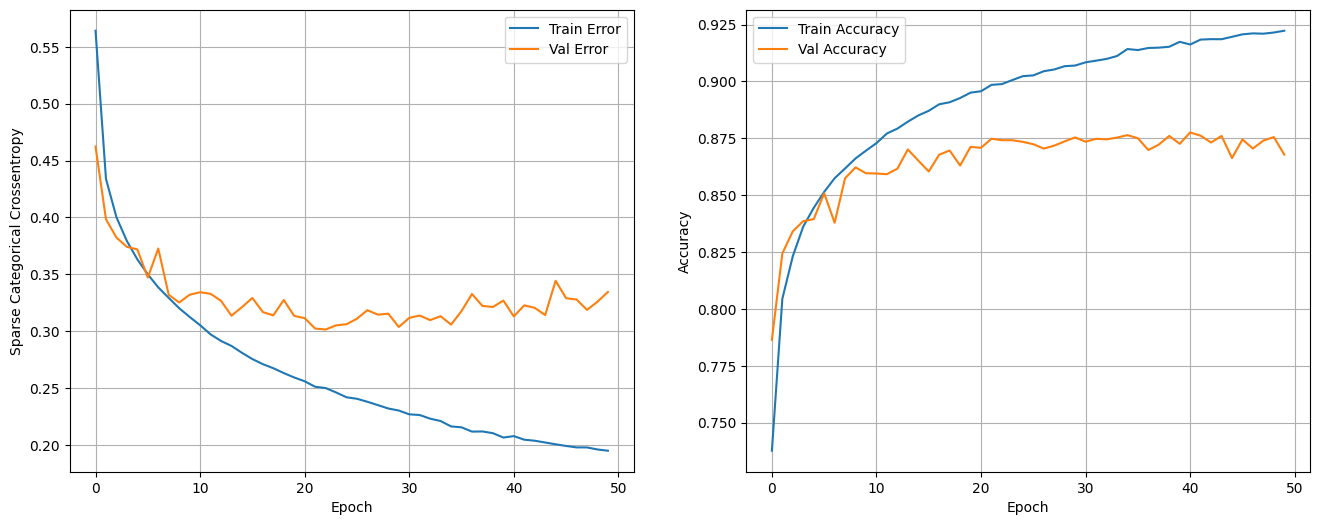

In [41]:
show_loss_accuracy_evolution(history)

Curva ROC

1381/1381 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step


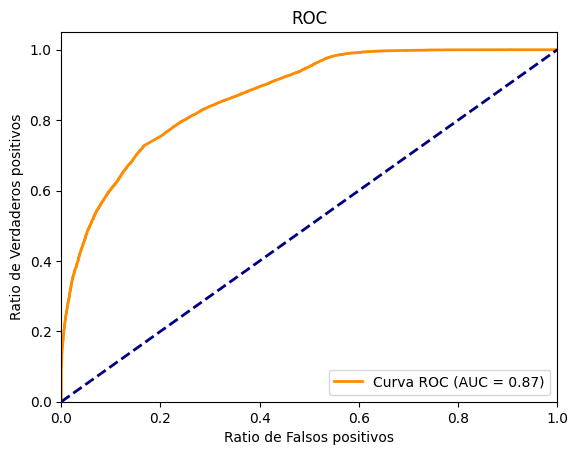

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_val_escalado = X_val*(1/255)
y_pred_prob = model4.predict(X_val_escalado)  

fpr, tpr, _ = roc_curve(y_val, y_pred_prob)  


roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos positivos')
plt.ylabel('Ratio de Verdaderos positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

1381/1381 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.84      0.88      0.86     20190
        REAL       0.89      0.85      0.87     24000

    accuracy                           0.86     44190
   macro avg       0.86      0.87      0.86     44190
weighted avg       0.87      0.86      0.86     44190



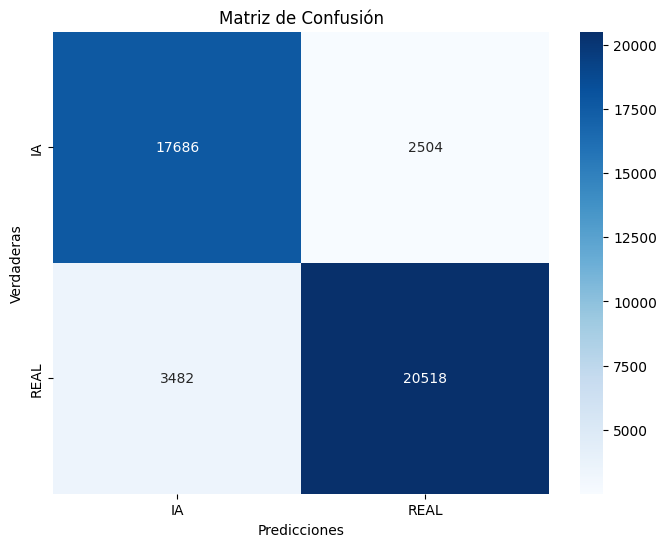

In [43]:
evaluate_model(model5,X_val, y_val)

## Predecimos 

In [44]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_path,model):

    # Cargar la imagen y redimensionar a 32x32
    image1 = Image.open(img_path)
    image1 = image1.resize((32, 32))  # Redimensionar la imagen a 32x32 píxeles
    img_ar = np.asarray(image1)
    img_ar_rs = img_ar / 255.0  # Normalizar la imagen
    img_ar_rs1 = img_ar_rs.reshape(-1, 32, 32, 3)  # Redimensionar la imagen al tamaño esperado por el modelo

    # Realizar la predicción
    pred = model.predict(img_ar_rs1)

    # Interpretar la predicción
    if pred > 0.5:
        print("La imagen es Real.")
    else:
        print("La imagen está generada por IA.")

In [46]:
predict("C:/Users/naira/OneDrive/Imágenes/Granada.jpg",model5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La imagen está generada por IA.


In [48]:
predict("C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/human face/dataset/FAKE/00c219e7956c82608c69c80655d8240525d175eb3fb44492c8bf10f06f5417e9.jpg",model5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
La imagen está generada por IA.


In [49]:
predict("C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/Starry-ia-1-1.jpg",model5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
La imagen es Real.


In [51]:
predict("C:/Users/naira/Downloads/00367bb327e5494356c3f3a5453633f978dde917.jpg",model5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
La imagen está generada por IA.


In [52]:
predict("C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/combinado1/train/REAL/0004 (8).jpg",model5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
La imagen es Real.


Guardamos el modelo 

In [75]:
model5.save('C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/modelo/combinado.h5')

# Transfer Learning

In [83]:
image_size = (32,32,3)
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=image_size, include_top=False)
pretrained_model.trainable = True

C:\Users\naira\AppData\Local\Temp\ipykernel_53152\1902825540.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = tf.keras.applications.MobileNetV2(input_shape=image_size, include_top=False)


In [84]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [85]:
inputs = tf.keras.Input(shape=image_size, name='input')

# pre-trained model
x = preprocess_input(inputs)
x = pretrained_model(x)

# classifier
flat = tf.keras.layers.Flatten()(x)
flat = tf.keras.layers.Dropout(0.5)(flat)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flat)

model_tl = tf.keras.Model(inputs, outputs)
model_tl.summary()

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 2,225,153 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [88]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

epochs = 20

import numpy as np
from sklearn.utils import class_weight

# Calcula las ponderaciones de las clases
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',  # La opción 'balanced' calcula las ponderaciones automáticamente.
    classes=np.unique(y_train),  # Las clases en tus datos.
    y=y_train  # El vector de etiquetas.
)

# Convierte el array de pesos a un diccionario para usarlo en el entrenamiento
class_weights_dict = dict(enumerate(class_weights))

es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=2,  
    verbose=1)

history = model_tl.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=epochs,
)

Epoch 1/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 464s 355ms/step - accuracy: 0.7250 - loss: 0.5940 - val_accuracy: 0.6328 - val_loss: 0.9465
Epoch 2/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 424s 384ms/step - accuracy: 0.7815 - loss: 0.4884 - val_accuracy: 0.5578 - val_loss: 1.8235
Epoch 3/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 392s 355ms/step - accuracy: 0.8172 - loss: 0.4154 - val_accuracy: 0.5842 - val_loss: 1.6637
Epoch 4/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 358s 324ms/step - accuracy: 0.8296 - loss: 0.3827 - val_accuracy: 0.8096 - val_loss: 0.7206
Epoch 5/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 217s 196ms/step - accuracy: 0.8455 - loss: 0.3558 - val_accuracy: 0.5484 - val_loss: 1.5968
Epoch 6/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 182s 165ms/step - accuracy: 0.8561 - loss: 0.3360 - val_accuracy: 0.7696 - val_loss: 0.6943
Epoch 7/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 188s 170ms/step - accuracy: 0.8640 - loss: 0.3201 - val_accuracy: 0.8050 - val_loss: 1.0328
Epoch 8/20
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 195s 176ms/step - ac

In [89]:
results = model_tl.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8273 - loss: 0.6033
Test Loss: 0.5980569124221802
Test Accuracy: 0.8260918855667114


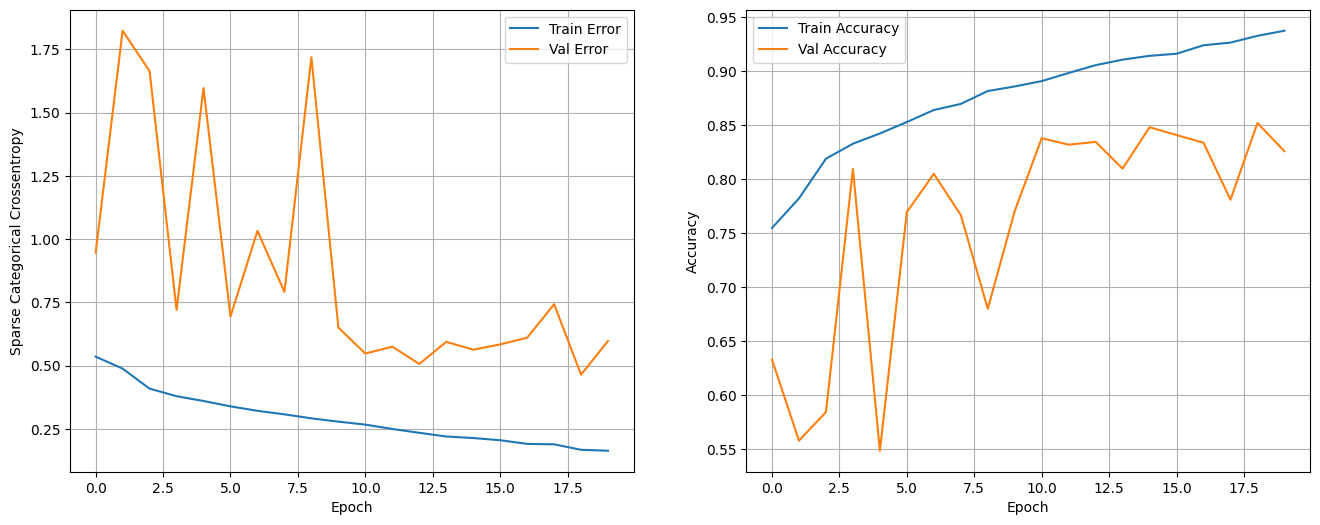

In [90]:
show_loss_accuracy_evolution(history)

1381/1381 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step


c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naira\anaconda3\envs\modelo1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.46      1.00      0.63     20190
        REAL       0.00      0.00      0.00     24000

    accuracy                           0.46     44190
   macro avg       0.23      0.50      0.31     44190
weighted avg       0.21      0.46      0.29     44190



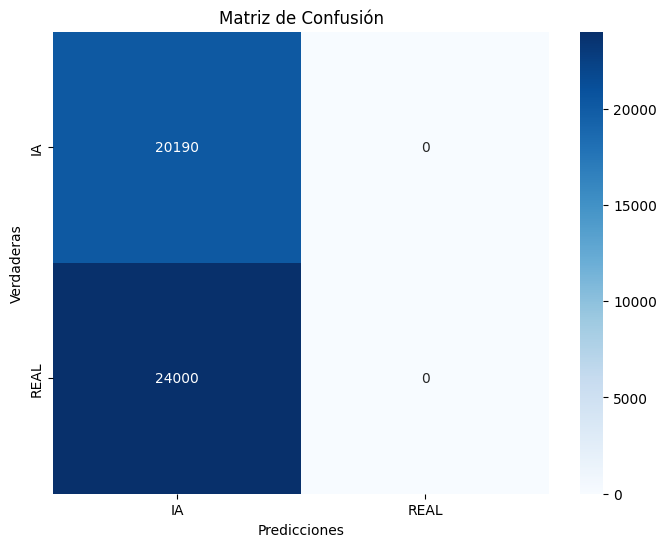

In [91]:
evaluate_model(model_tl,X_val, y_val)

1381/1381 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step


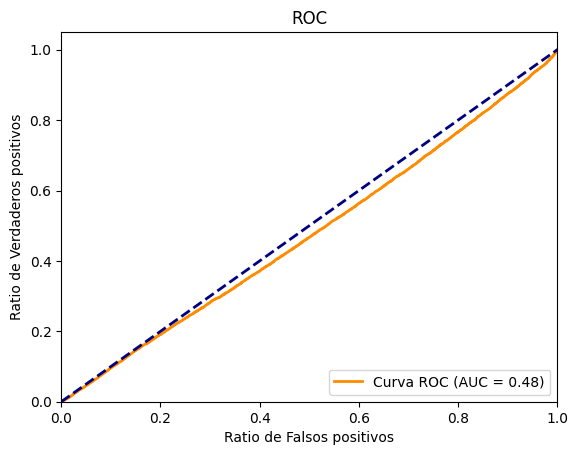

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_val_escalado = X_val*(1/255)
y_pred_prob = model_tl.predict(X_val_escalado)  

fpr, tpr, _ = roc_curve(y_val, y_pred_prob)  


roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos positivos')
plt.ylabel('Ratio de Verdaderos positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()